# Comparing Algorithms

In [1]:
import sys
import random
import os

# add library to path (or else, src not visible)
sys.path.insert(0, "../../")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

from src.AllocationSolver import AllocationSolver
from src.dists import SymmetricDiscreteDistribution, Distribution, UniformDistribution, NormalDistribution
from src.plots import generate_data, generate_scarcity_data, save_data, save_scarcity_data, load_data, load_scarcity_data, summary_plots, scarcity_plots
from src.monte_carlo import hoeffding_bound
from src.format_data import clean_data
from src.random_problem import generate_random_problem, generate_normal_distribution, generate_uniform_distribution

# use seaborn style plotting for paper
sns.set_context("paper")
sns.set_style("whitegrid")

In [2]:
algos = ["lambda_time", "ppa", "greedy", "guarantee"]
num_agents = 50
mc_iters = 10000

## Uniform

$a, b$ drawn from Uniform(1, 10).

### Summary

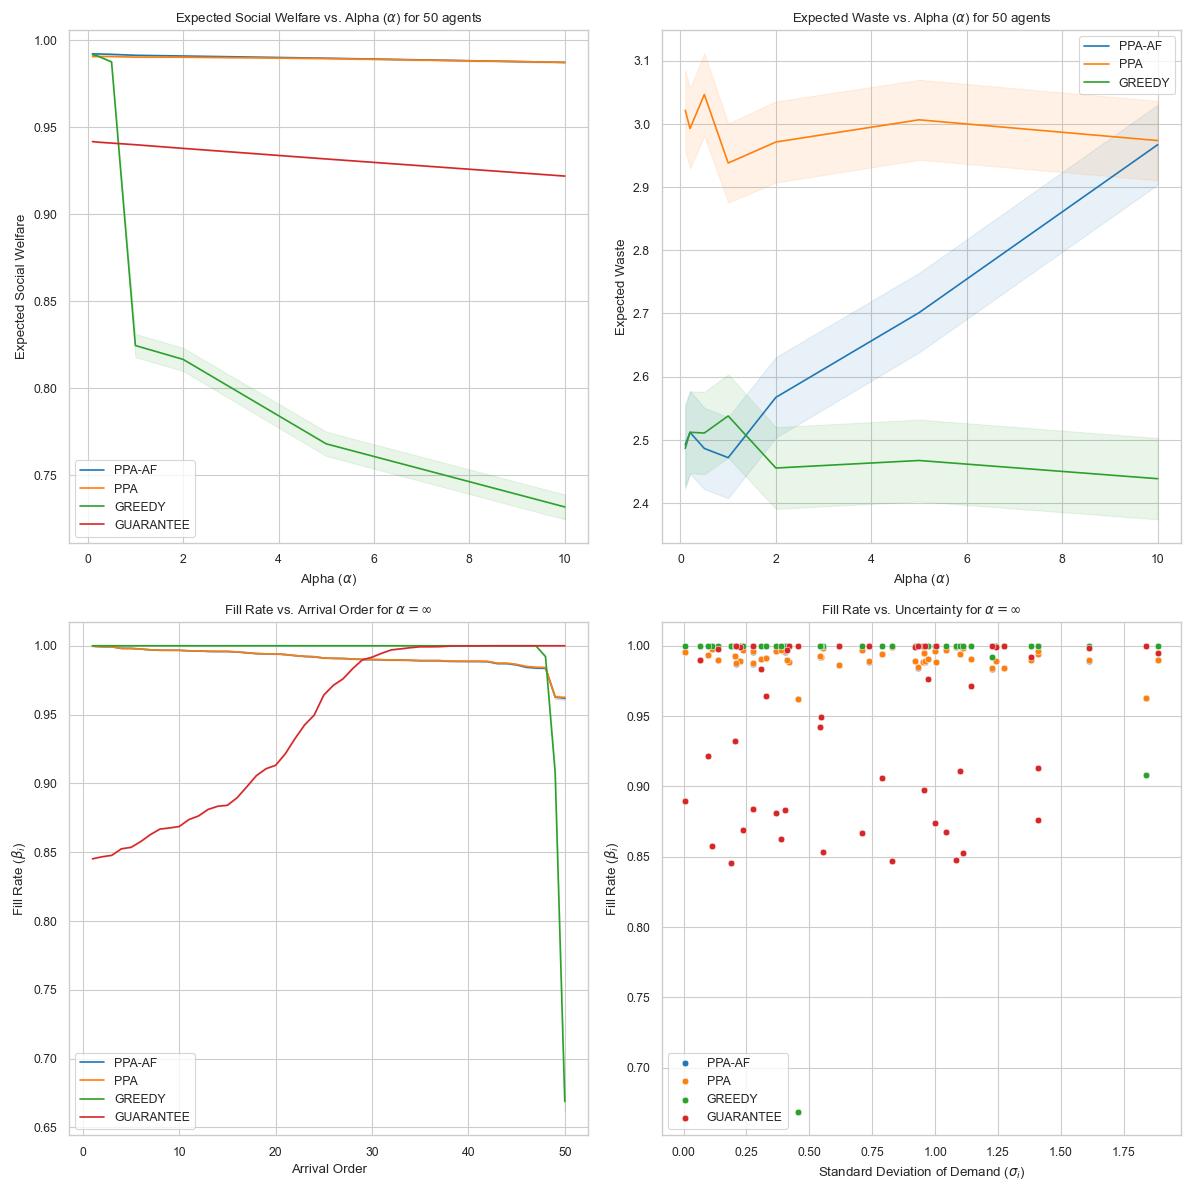

In [3]:
random.seed(0)
np.random.seed(0)
file_name = "uniform_summary"

if not os.path.exists(f"../../data/{file_name}.npz"):
    prob = generate_random_problem(
        N=num_agents,
        distribution_generator=generate_uniform_distribution((1, 10)),
        supply_scarcity=1
    )

    data = generate_data(
        prob,
        algos,
        n=mc_iters,
        tol=0.01,
    )
    save_data(data, file_name)
else:
    data = load_data(file_name)

summary_plots(data, algos)

### Scarcity

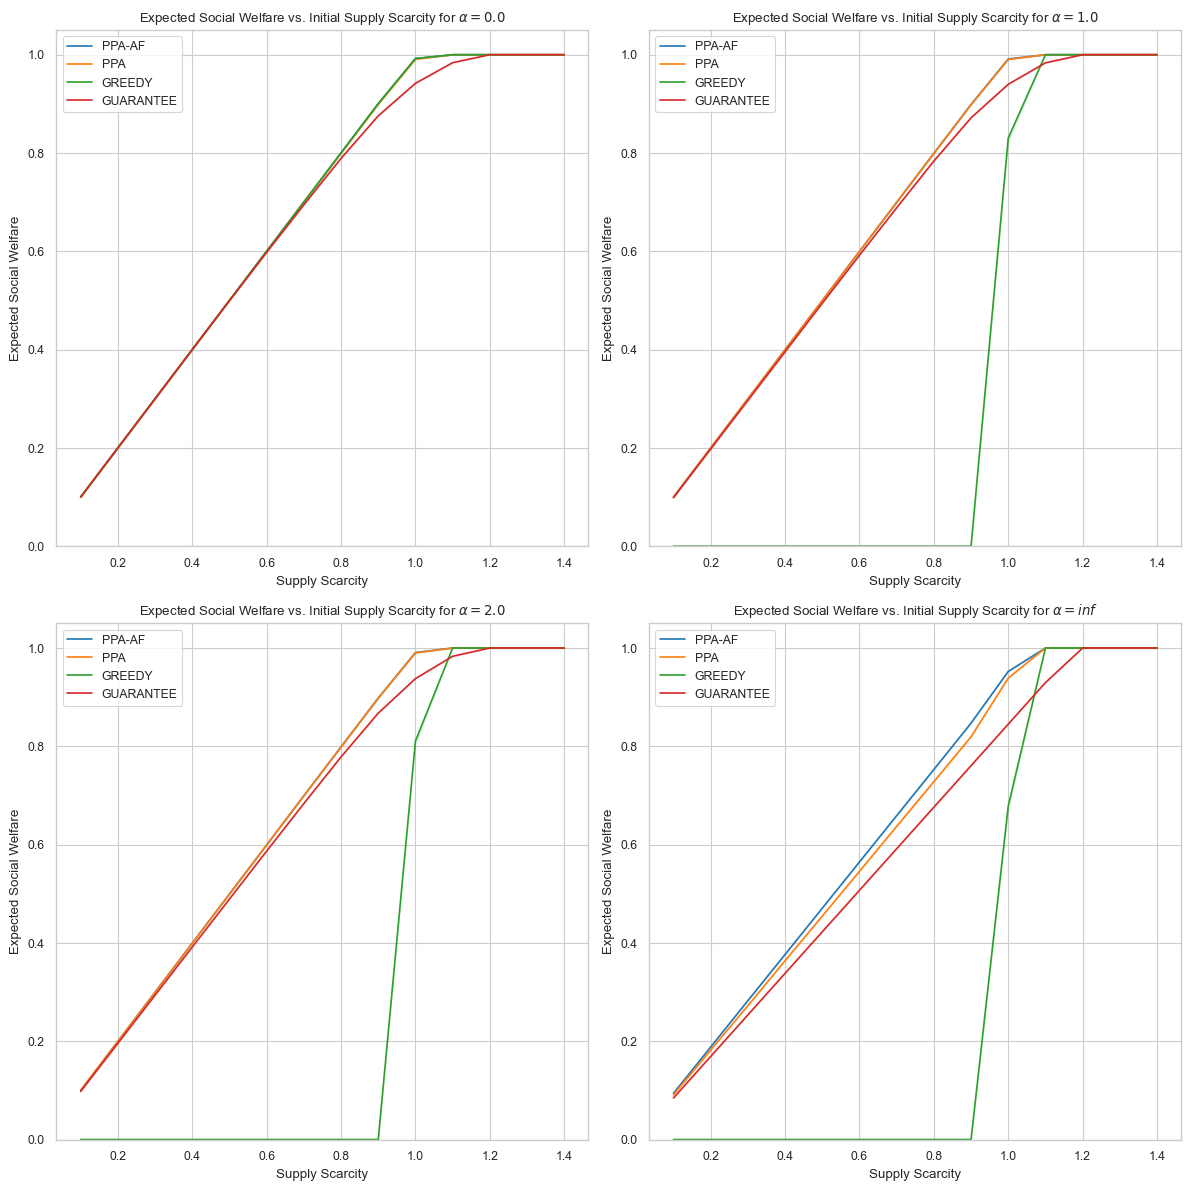

In [4]:
random.seed(0)
np.random.seed(0)
file_name = "uniform_scarcity"

if not os.path.exists(f"../../data/{file_name}.npz"):
    prob = generate_random_problem(
        N=num_agents,
        distribution_generator=generate_uniform_distribution((1, 10)),
        supply_scarcity=1
    )

    data = generate_scarcity_data(
        prob,
        algos,
        n=mc_iters,
        tol=0.01,
    )
    save_scarcity_data(data, file_name)
else:
    data = load_scarcity_data(file_name)

scarcity_plots(data, algos)

## Gaussian

$\mu \sim \text{Uniform}(1, 10)$, $\sigma = \frac{1}{2} \mu$

### Summary

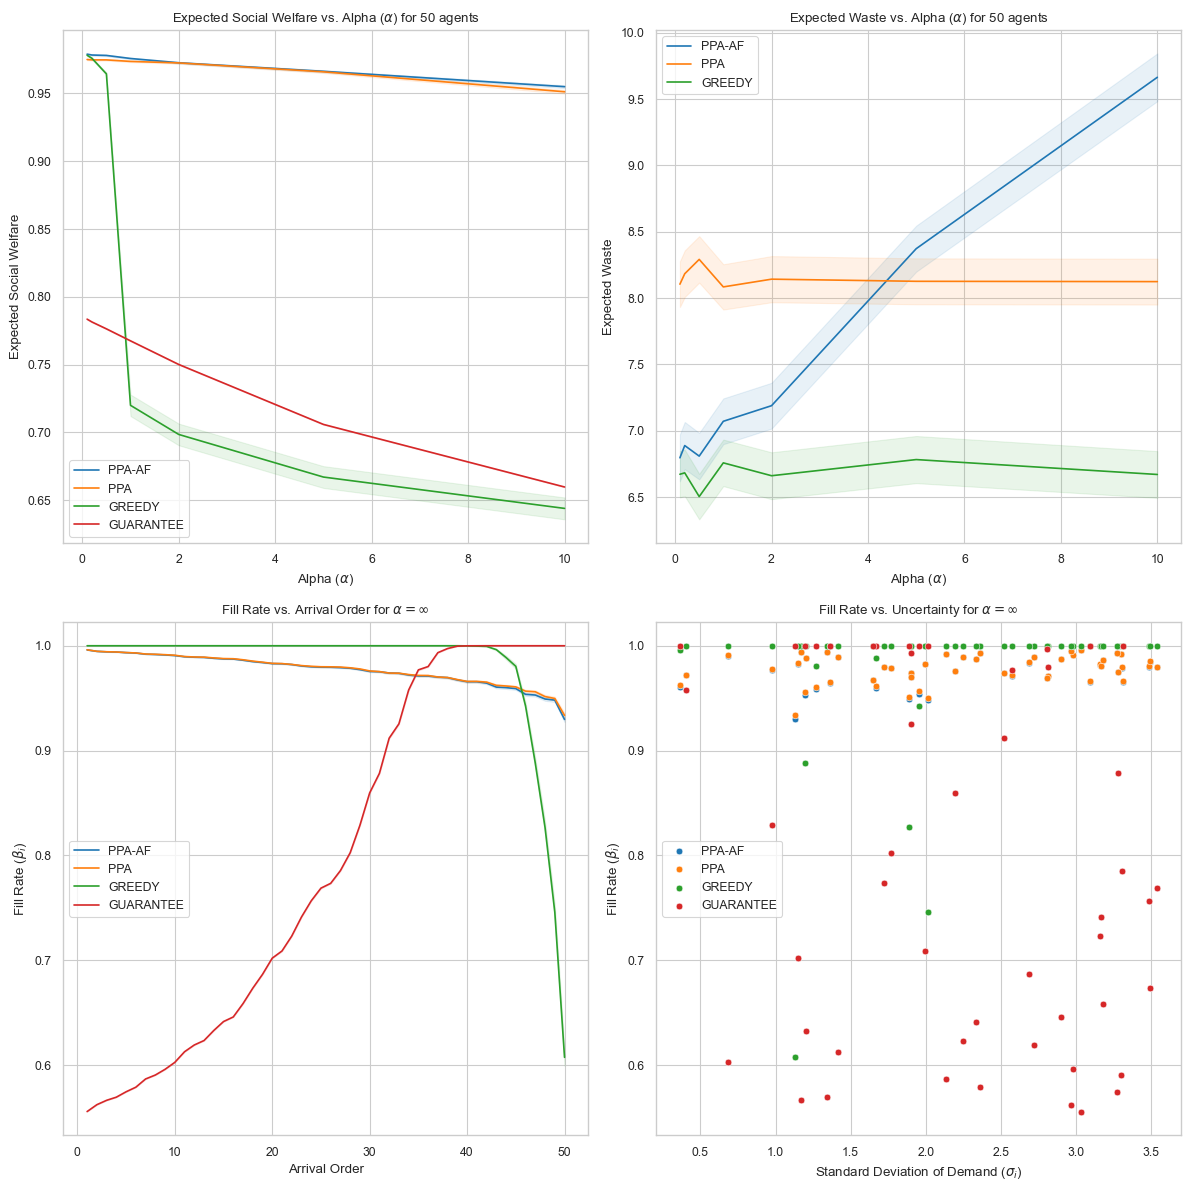

In [5]:
random.seed(0)
np.random.seed(0)
file_name = "gaussian_summary"

if not os.path.exists(f"../../data/{file_name}.npz"):
    prob = generate_random_problem(
        N=num_agents,
        distribution_generator=generate_normal_distribution((1, 10), 0.5, 10),
        supply_scarcity=1
    )

    data = generate_data(
        prob,
        algos,
        n=mc_iters,
        tol=0.01,
    )
    save_data(data, file_name)
else:
    data = load_data(file_name)

summary_plots(data, algos)

### Scarcity

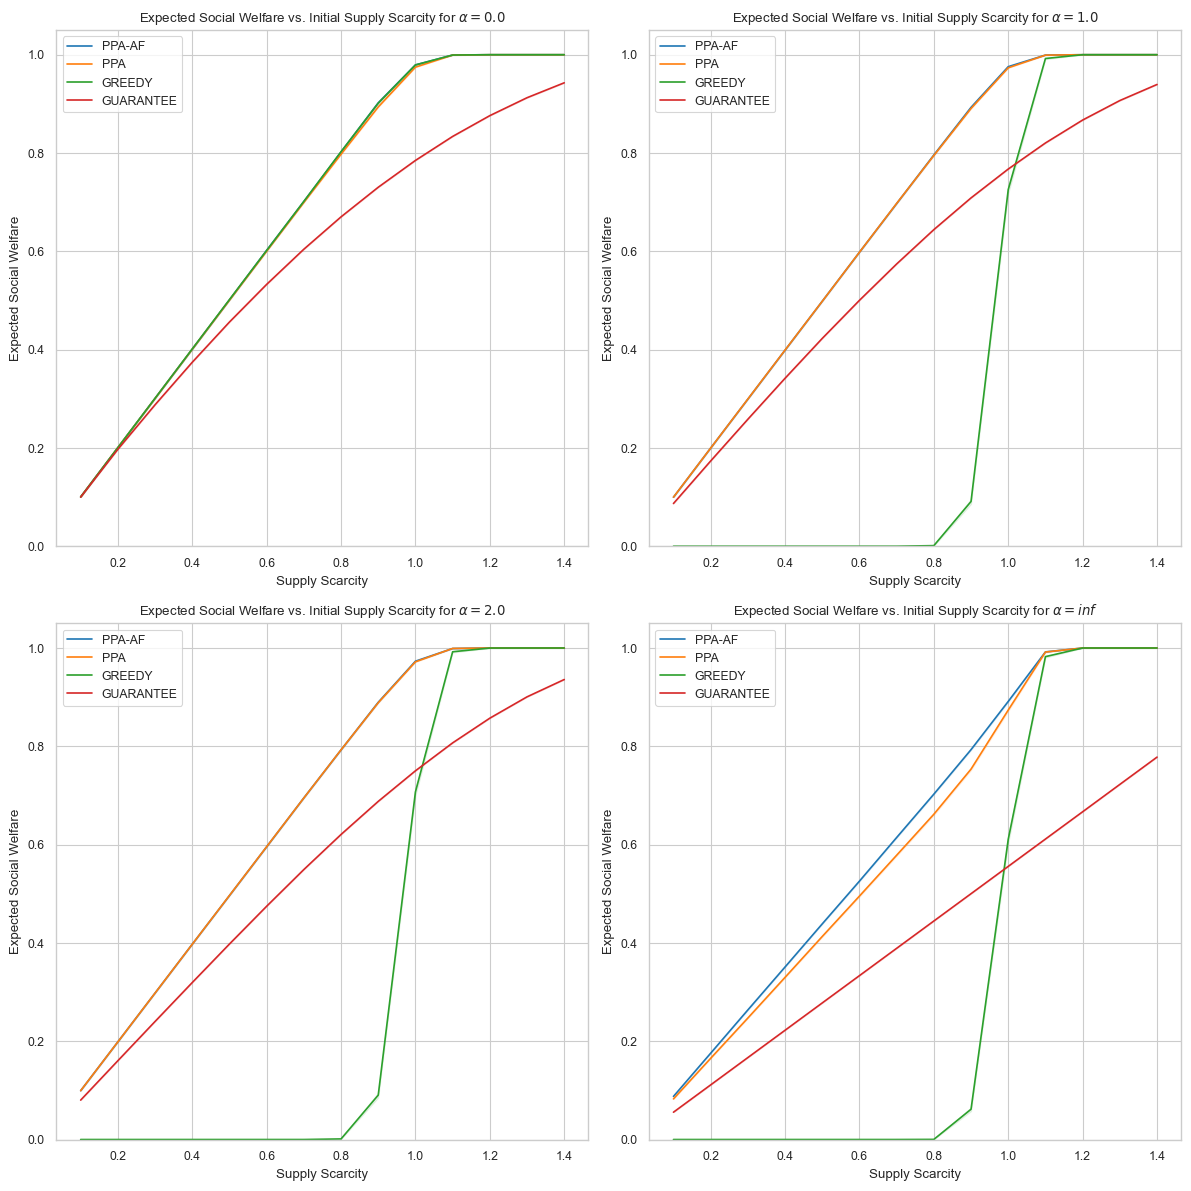

In [6]:
random.seed(0)
np.random.seed(0)
file_name = "gaussian_scarcity"

if not os.path.exists(f"../../data/{file_name}.npz"):
    prob = generate_random_problem(
        N=num_agents,
        distribution_generator=generate_normal_distribution((1, 10), 0.5, 10),
        supply_scarcity=1
    )

    data = generate_scarcity_data(
        prob,
        algos,
        n=mc_iters,
        tol=0.01,
    )
    save_scarcity_data(data, file_name)
else:
    data = load_scarcity_data(file_name)

scarcity_plots(data, algos)

## Real World Data -- Mobile Food Pantry

Gaussian demands. We first get and clean the data.

In [7]:
data = clean_data(pd.read_excel("../../data/mfp_food_pantries.xlsx"))

# create demand distributions
demand_dists = [NormalDistribution(mu, sigma) for mu, sigma in zip(data["avg_demand"], data["std_demand"])]

prob = AllocationSolver(
    demand_distributions=demand_dists,
    initial_supply=sum(demand_dists[i].mean() for i in range(len(demand_dists))),
    alpha=1,
    allocation_method="ppa"
)

### Summary

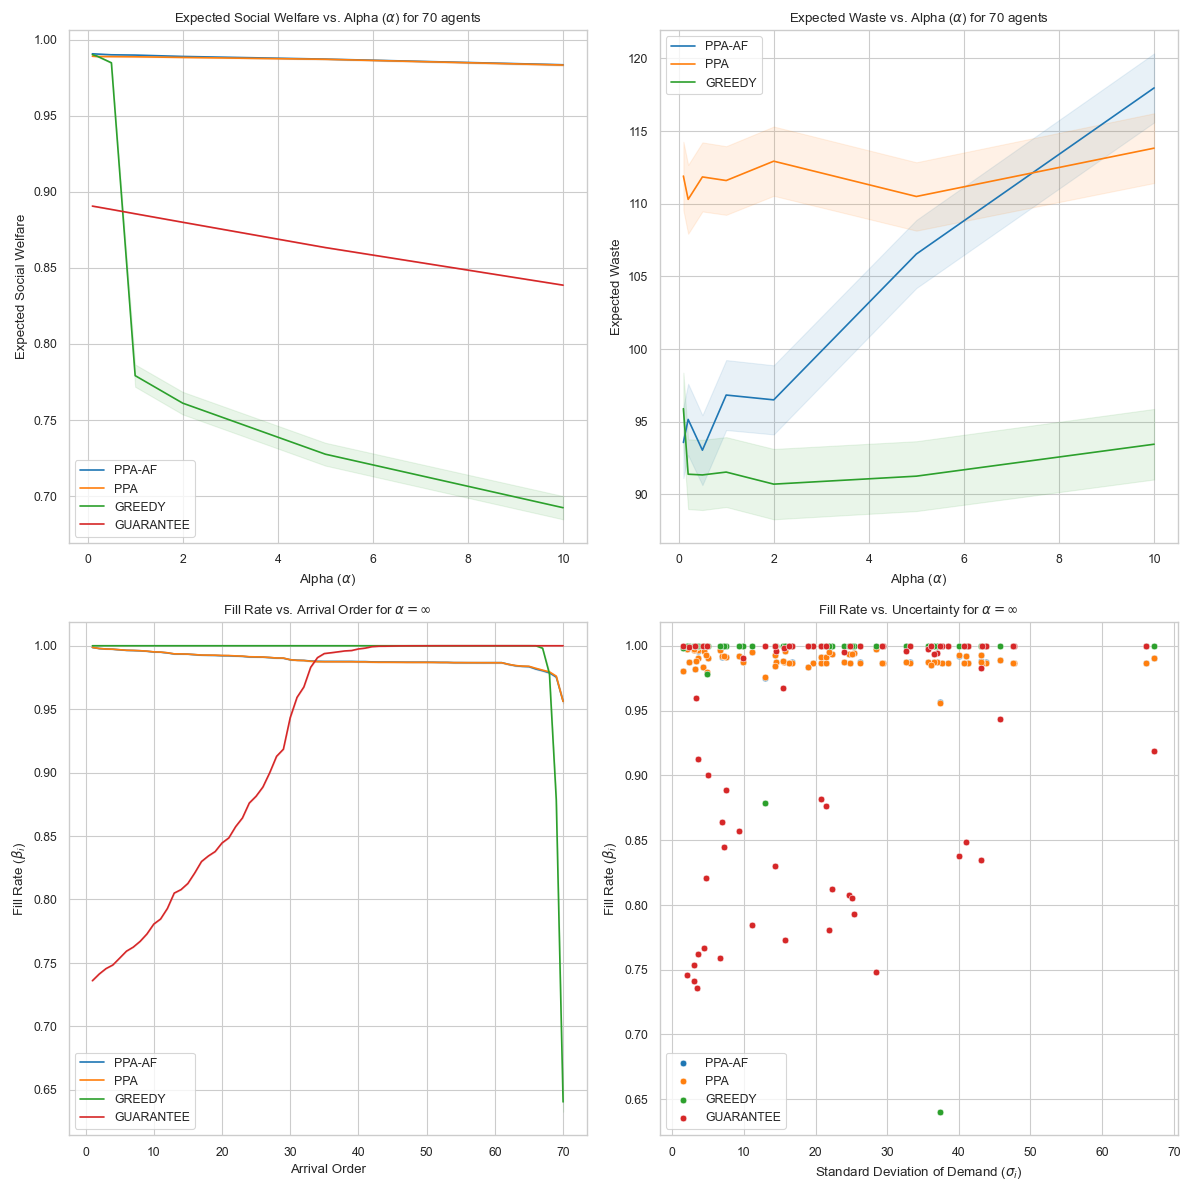

In [8]:
random.seed(0)
np.random.seed(0)
file_name = "mfp_summary"

if not os.path.exists(f"../../data/{file_name}.npz"):
    data = generate_data(
        prob,
        algos,
        n=mc_iters,
        tol=0.01,
    )
    save_data(data, file_name)
else:
    data = load_data(file_name)

summary_plots(data, algos)

### Scarcity

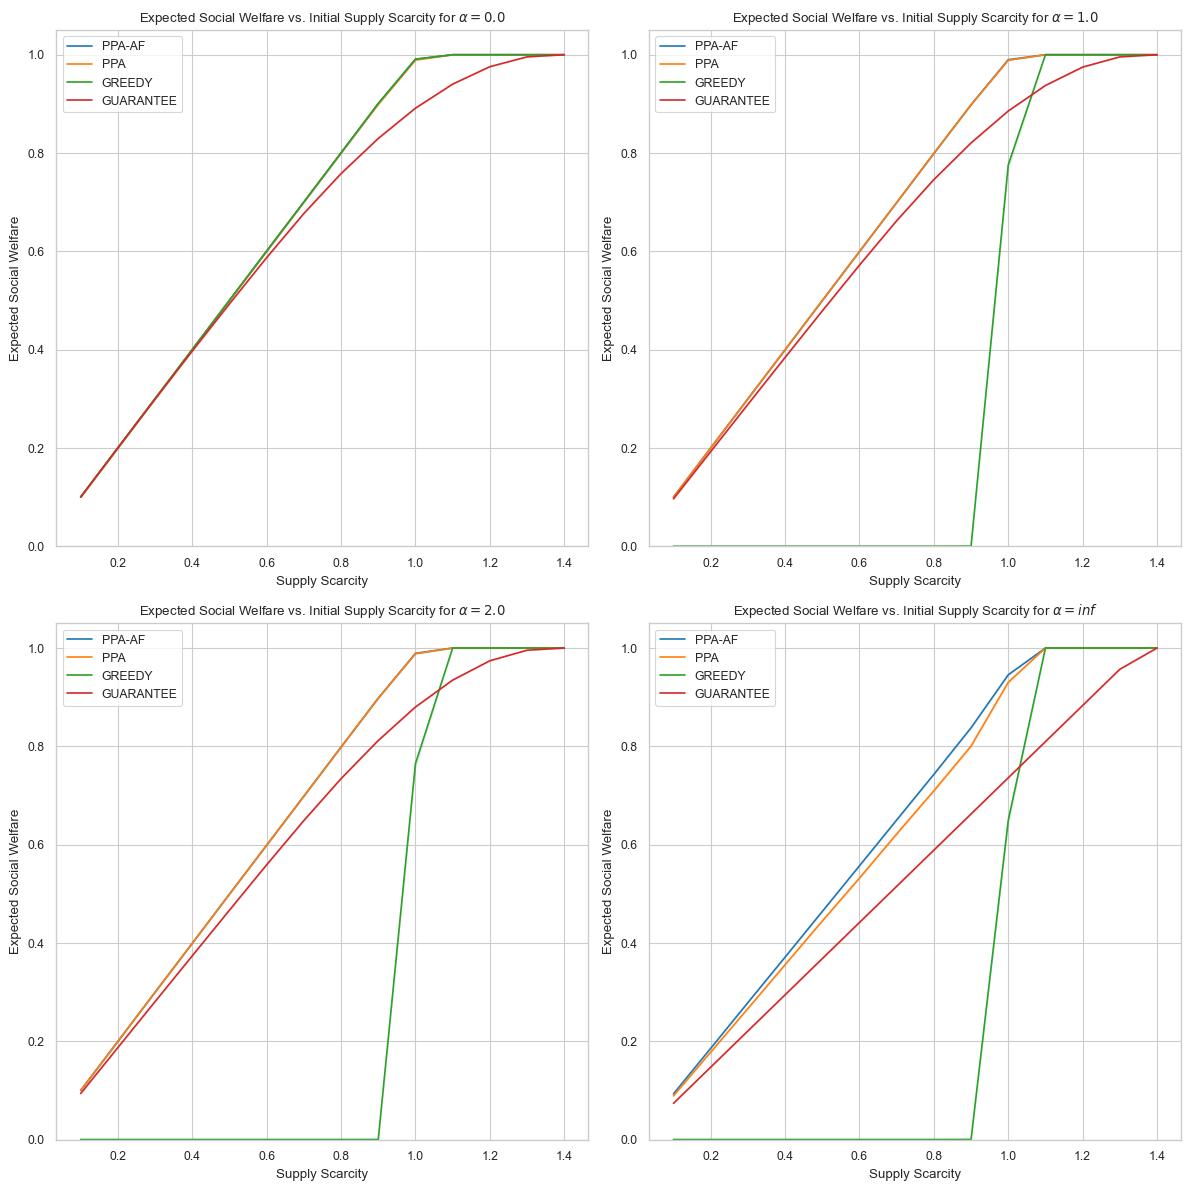

In [9]:
random.seed(0)
np.random.seed(0)
file_name = "mfp_scarcity"

if not os.path.exists(f"../../data/{file_name}.npz"):
    data = generate_scarcity_data(
        prob,
        algos,
        n=mc_iters,
        tol=0.01,
    )
    save_scarcity_data(data, file_name)
else:
    data = load_scarcity_data(file_name)

scarcity_plots(data, algos)